In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Dense

import numpy as np

from tensorflow.math import exp
from tensorflow.linalg import matmul


2022-12-27 10:50:47.409507: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-27 10:50:47.495311: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-27 10:50:47.882867: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-27 10:50:47.882901: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not l

## Dense Layers

### Shapes of Dense Layers

In [4]:
N, n_feature = 8, 10 # N = mini_batch_size
x = tf.random.normal(shape=(N, n_feature))

n_neuron = 3
dense = Dense(units=n_neuron, activation='sigmoid')
Y = dense(x)

W, B = dense.get_weights()

print('==== Input/Weights/Bias ====')
print('x : ', x.shape)
print('W : ', W)
print('B : ', B)
print('Y : ', Y)

==== Input/Weights/Bias ====
x :  (8, 10)
W :  [[-0.003986   -0.42037022 -0.02229548]
 [-0.24959928  0.19119245 -0.46333355]
 [ 0.06283194  0.35276604  0.05021161]
 [-0.02062023 -0.22871602  0.44495606]
 [-0.2739465  -0.3654262   0.46425486]
 [ 0.4270395  -0.18348166 -0.00234991]
 [-0.45126635 -0.07442021 -0.16991204]
 [-0.15779608  0.38601172 -0.12705433]
 [ 0.62460935 -0.05516446 -0.5326715 ]
 [-0.08947092 -0.66530514 -0.38687313]]
B :  [0. 0. 0.]
Y :  tf.Tensor(
[[0.30372304 0.62885666 0.21883622]
 [0.48433518 0.9348014  0.7948926 ]
 [0.75868016 0.5685803  0.35260913]
 [0.49549472 0.5815093  0.18193194]
 [0.22761764 0.7433179  0.85842514]
 [0.22010209 0.6802021  0.3166626 ]
 [0.3675644  0.26581192 0.62388086]
 [0.61095864 0.57401395 0.8761297 ]], shape=(8, 3), dtype=float32)


2022-12-27 10:50:50.297928: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-27 10:50:50.298048: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-27 10:50:50.312922: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-12-27 10:50:50.312947: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to do

### Output of Calculations

In [5]:
N, n_feature = 4, 10 # N = mini_batch_size
X = tf.random.normal(shape=(N, n_feature))

n_neuron = 3
dense = Dense(units=n_neuron, activation='sigmoid')
Y_tf = dense(X)

W, B = dense.get_weights()

print('==== Input/Weights/Bias ====')
print('Y(Tensorflow) : \n', Y_tf.numpy())

# calculate with matrix multiplication
Z = matmul(X, W) + B
Y_man_matmul = 1 / (1+exp(-Z))
print('Y(with matrix multiplication : \n', Y_man_matmul.numpy())

# calculate with dot products
Y_man_vec = np.zeros(shape=(N, n_neuron))
for x_idx in range(N):
    x= X[x_idx]

    for nu_idx in range(n_neuron):
        w, b = W[:,nu_idx], B[nu_idx]

        z = tf.reduce_sum(x * w) + b
        a = 1 / (1 + np.exp(-z))
        Y_man_vec[x_idx, nu_idx] = a

print('Y(with dot products) : \n', Y_man_vec)

==== Input/Weights/Bias ====
Y(Tensorflow) : 
 [[0.23153035 0.2432429  0.3962335 ]
 [0.47804207 0.15248865 0.2001262 ]
 [0.36394203 0.35517892 0.44721776]
 [0.17800133 0.5816596  0.71879816]]
Y(with matrix multiplication : 
 [[0.23153037 0.24324293 0.3962335 ]
 [0.47804204 0.15248866 0.2001262 ]
 [0.363942   0.3551789  0.44721773]
 [0.17800133 0.5816596  0.71879816]]
Y(with dot products) : 
 [[0.23153035 0.24324292 0.39623352]
 [0.47804203 0.15248865 0.20012616]
 [0.36394195 0.35517891 0.44721774]
 [0.17800133 0.58165963 0.71879815]]


### Cascaded Dense Layer

In [6]:
N, n_feature = 4, 10
X = tf.random.normal(shape=(N,n_feature))

n_neurons = [3, 5]
dense1 = Dense(units=n_neurons[0], activation='sigmoid')
dense2 = Dense(units=n_neurons[1], activation='sigmoid')

# forward propagation
A1 = dense1(X)
Y = dense2(A1)

# get weight/bias
W1, B1 = dense1.get_weights()
W2, B2 = dense2.get_weights()

print(f'X : {X.shape}\n')

print(f'W1 : {W1.shape}\n')
print(f"B1 : {B1.shape}\n")
print(f'A1 : {A1.shape}\n')

print(f'W2 : {W2.shape}\n')
print(f"B2 : {B2.shape}\n")
print(f'Y : {Y.shape}\n')

X : (4, 10)

W1 : (10, 3)

B1 : (3,)

A1 : (4, 3)

W2 : (3, 5)

B2 : (5,)

Y : (4, 5)



### Dense Layers with Python List

In [7]:
N, n_feature = 4, 10
X = tf.random.normal(shape=(N,n_feature))

n_neurons = [neuron for neuron in range(10, 110, 10)]

dense_layers = []

for n_neuron in n_neurons:
    dense = Dense(units=n_neuron, activation = 'relu')
    dense_layers.append(dense)

print('Input : ', X.shape)

for dense_idx, dense in enumerate(dense_layers):
    X = dense(X)
    print('After dense layer : ', dense_idx+1)
    print(X.shape,'\n')

Y = X

Input :  (4, 10)
After dense layer :  1
(4, 10) 

After dense layer :  2
(4, 20) 

After dense layer :  3
(4, 30) 

After dense layer :  4
(4, 40) 

After dense layer :  5
(4, 50) 

After dense layer :  6
(4, 60) 

After dense layer :  7
(4, 70) 

After dense layer :  8
(4, 80) 

After dense layer :  9
(4, 90) 

After dense layer :  10
(4, 100) 



### Output Calculations

In [8]:
N, n_feature = 4, 10
X = tf.random.normal(shape=(N,n_feature))
X_cp = tf.identity(X)

n_neurons = [3, 5]
dense1 = Dense(units=n_neurons[0], activation='sigmoid')
dense2 = Dense(units=n_neurons[1], activation='sigmoid')

# forward propagation
A1 = dense1(X)
Y = dense2(A1)

# get weight/bias
W1, B1 = dense1.get_weights()
W2, B2 = dense2.get_weights()


n_neurons = [3, 4, 5]

dense_layers = []

for n_neuron in n_neurons:
    dense = Dense(units=n_neuron, activation = 'sigmoid')
    dense_layers.append(dense)
# forward propagation (Tensorflow)
W, B = [], []
for dense_idx, dense in enumerate(dense_layers):
    X = dense(X)
    w,b = dense.get_weights()

    W.append(w)
    B.append(b)
print('Y(Tensorflow) : \n', X.numpy())

# forward propagation (Manual)
for layer_idx in range(len(n_neurons)):
    w, b = W[layer_idx], B[layer_idx]

    X_cp = matmul(X_cp, w) + b
    X_cp = 1 / (1 + exp(-X_cp))

print('Y(Manual) : \n', X_cp.numpy())

Y(Tensorflow) : 
 [[0.41262475 0.5832658  0.54148126 0.28874835 0.6106126 ]
 [0.4187342  0.5680793  0.52925336 0.28756303 0.59364635]
 [0.424027   0.57171065 0.52024543 0.29224935 0.5890229 ]
 [0.4152527  0.57052165 0.5356976  0.28618667 0.59962773]]
Y(Manual) : 
 [[0.41262475 0.5832657  0.54148126 0.28874835 0.6106126 ]
 [0.41873416 0.5680793  0.5292533  0.28756303 0.5936463 ]
 [0.42402703 0.5717107  0.52024543 0.29224932 0.5890229 ]
 [0.41525272 0.57052165 0.53569764 0.28618664 0.5996278 ]]


## Model Implementation

### Model Implementation with Sequential Method

In [9]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential, Model

In [10]:
# 연속적인 Layer를 구성할 때
model = Sequential()
model.add(Dense(units=10, activation='sigmoid'))
model.add(Dense(units=20, activation='sigmoid'))

### Model Implementation with Model-subclassing

In [11]:
class TestModel(Model):
    def __init__(self):
        super(TestModel, self).__init__()

        self.dense1 = Dense(units=10, activation='sigmoid')
        self.dense2 = Dense(units=20, activation='sigmoid')
model = TestModel()
print(model.dense1)
print(model.dense2)

### Forward Propagation of Models

In [12]:
X = tf.random.normal(shape=(4,10))

model = Sequential()
model.add(Dense(units=10, activation='sigmoid'))
model.add(Dense(units=20, activation='sigmoid'))

Y = model(X)
print(Y.numpy)

# Model-subclassing
class TestModel(Model):
    def __init__(self):
        super(TestModel, self).__init__()

        self.dense1 = Dense(units=10, activation='sigmoid')
        self.dense2 = Dense(units=20, activation='sigmoid')

    def call(self,x):
        x = self.dense1(x)
        x = self.dense2(x)

        return x

model = TestModel()
Y = model(X)
print(Y.numpy)

<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(4, 20), dtype=float32, numpy=
array([[0.414988  , 0.26759732, 0.5883941 , 0.39764094, 0.4992156 ,
        0.48156297, 0.56844085, 0.40243348, 0.46752146, 0.5235986 ,
        0.51423335, 0.6956967 , 0.44737574, 0.50425434, 0.5362655 ,
        0.41854978, 0.6321462 , 0.6847917 , 0.54695094, 0.43191537],
       [0.43834263, 0.26305908, 0.6155654 , 0.46208385, 0.4937124 ,
        0.46742633, 0.65574366, 0.3635785 , 0.57995015, 0.57218295,
        0.51117885, 0.7025895 , 0.53072727, 0.49551612, 0.4443239 ,
        0.3845901 , 0.6876929 , 0.6670739 , 0.6001562 , 0.53997934],
       [0.47338882, 0.35706705, 0.5863388 , 0.37155282, 0.4260514 ,
        0.46332252, 0.5766311 , 0.42682052, 0.45188513, 0.46735266,
        0.5185507 , 0.62329686, 0.5301727 , 0.5123669 , 0.5542465 ,
        0.4140951 , 0.55547005, 0.7032957 , 0.59165645, 0.4716164 ],
       [0.4158184 , 0.2407112 , 0.6027296 , 0.3570838 , 0.5448021 ,
        0.52143735, 0.56

In [13]:
class TestModel(Model):
    def __init__(self, n_neurons):
        super(TestModel, self).__init__()
        self.n_neurons = n_neurons

        self.dense_layers = []
        for n_neuron in self.n_neurons:
            self.dense_layers.append(Dense(units=n_neuron, activation='sigmoid'))

    def call(self,x):
        for dense in self.dense_layers:
            x = dense(x)

        return x

n_neurons = [3, 4, 5]
model = TestModel(n_neurons)

### Layers Models

In [14]:
model = Sequential()
model.add(Dense(units=10, activation='sigmoid'))
model.add(Dense(units=20, activation='sigmoid'))

Y = model(X)

print(type(model.layers))
print(model.layers)

dense1 = model.layers[0]
print(dense1)

for tmp in dir(dense1):
    print(tmp)

<class 'list'>
[<keras.layers.core.dense.Dense object at 0x7faf4c518d00>, <keras.layers.core.dense.Dense object at 0x7faf8d6e68b0>]
_TF_MODULE_IGNORED_PROPERTIES
__call__
__class__
__delattr__
__dict__
__dir__
__doc__
__eq__
__format__
__ge__
__getattribute__
__getstate__
__gt__
__hash__
__init__
__init_subclass__
__le__
__lt__
__module__
__ne__
__new__
__reduce__
__reduce_ex__
__repr__
__setattr__
__setstate__
__sizeof__
__str__
__subclasshook__
__weakref__
_activity_regularizer
_add_trackable
_add_trackable_child
_add_variable_with_custom_getter
_auto_config
_auto_get_config
_auto_track_sub_layers
_autocast
_autographed_call
_build_input_shape
_call_spec
_callable_losses
_captured_weight_regularizer
_cast_single_input
_checkpoint_dependencies
_clear_losses
_compute_dtype
_compute_dtype_object
_dedup_weights
_deferred_dependencies
_delete_tracking
_deserialization_dependencies
_deserialize_from_proto
_dtype
_dtype_policy
_dynamic
_eager_losses
_expects_mask_arg
_expects_training_arg
_

### Trainable Variables in Models

In [15]:
model = Sequential()
model.add(Dense(units=10, activation='sigmoid'))
model.add(Dense(units=20, activation='sigmoid'))

Y = model(X)

print(type(model.trainable_variables))
print(len(model.trainable_variables))

for train_var in model.trainable_variables:
    print(type(train_var))
    print(train_var.shape)

<class 'list'>
4
<class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>
(10, 10)
<class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>
(10,)
<class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>
(10, 20)
<class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>
(20,)


## The Graphs of Odds, Logit and Sigmoid

### The Graphs of odds and Logit

/tmp/ipykernel_839442/1102347496.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0.5, 0, 'Probability')

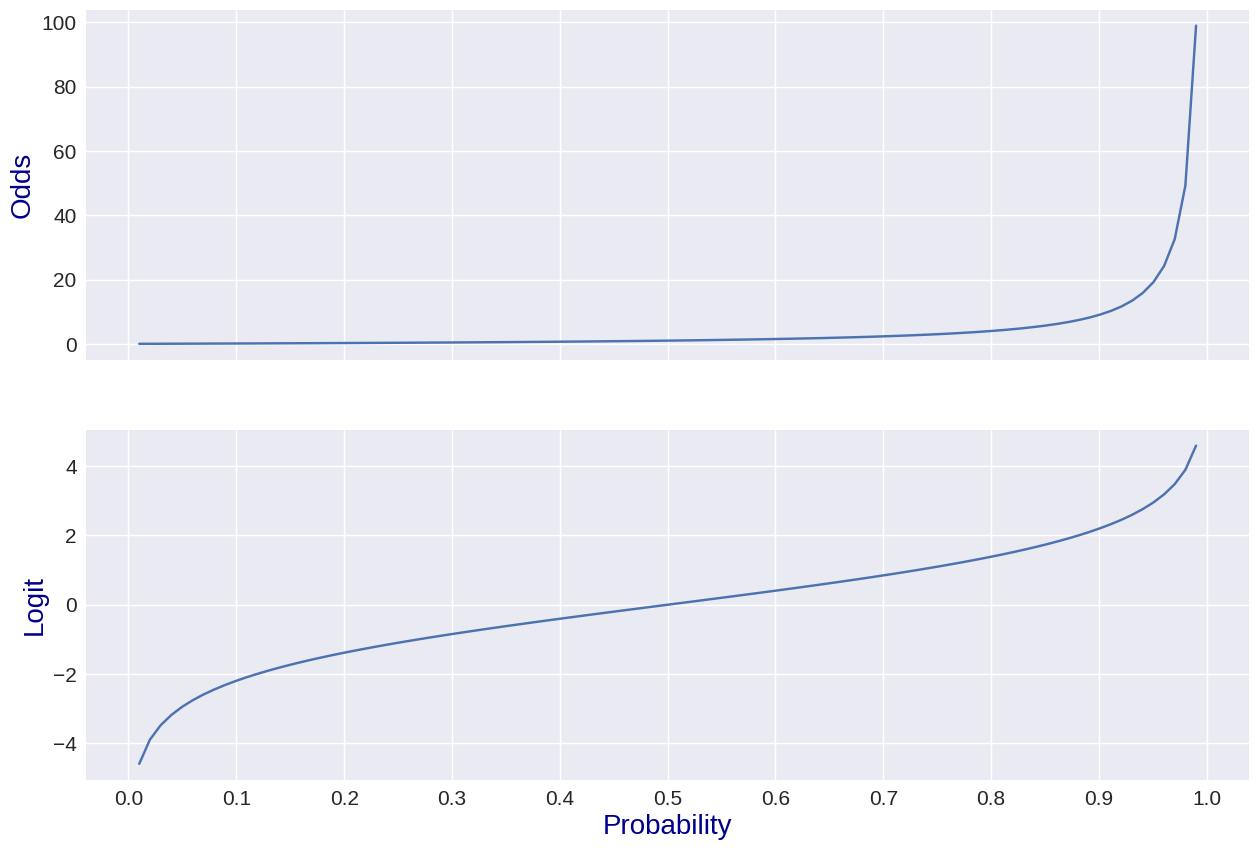

In [24]:
import numpy as np
import tensorflow as tf

import matplotlib.pylab as plt
plt.style.use('seaborn')

p_np = np.linspace(0.01, 0.99, 100)
p_tf = tf.linspace(0.01, 0.99, 100)

odds_np = p_np/(1-p_np)
odds_tf = p_tf/(1-p_tf)

logit_np = np.log(odds_np)
logit_tf = tf.math.log(odds_tf)

fig, axes = plt.subplots(2, 1, figsize=(15,10),
                        sharex=True)
axes[0].plot(p_np, odds_np)
axes[1].plot(p_np, logit_np)

xitcks = np.arange(0,1.1,0.1)
axes[0].tick_params(labelsize=15)
axes[0].set_xticks(xitcks)
axes[0].set_ylabel('Odds', fontsize=20, color='darkblue')

axes[1].tick_params(labelsize=15)
axes[1].set_xticks(xitcks)
axes[1].set_ylabel('Logit', fontsize=20, color='darkblue')
axes[1].set_xlabel('Probability', fontsize=20, color='darkblue')

### The Graphs of Sigmoid

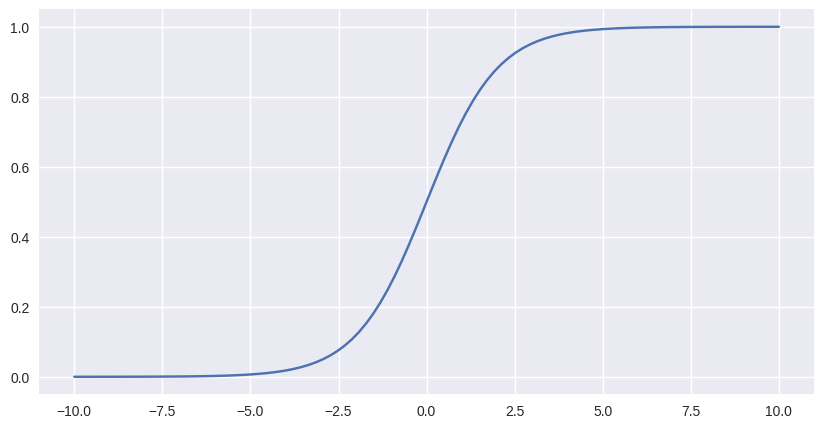

In [25]:
from tensorflow.keras.layers import Activation

X = tf.linspace(-10, 10, 100)
sigmoid = Activation('sigmoid')(X)

fig, ax = plt.subplots(figsize=(10,5))

ax.plot(X.numpy(), sigmoid.numpy())

## Logistic Regression Models

### Single-variate Logistic Regression Models

(100, 1)


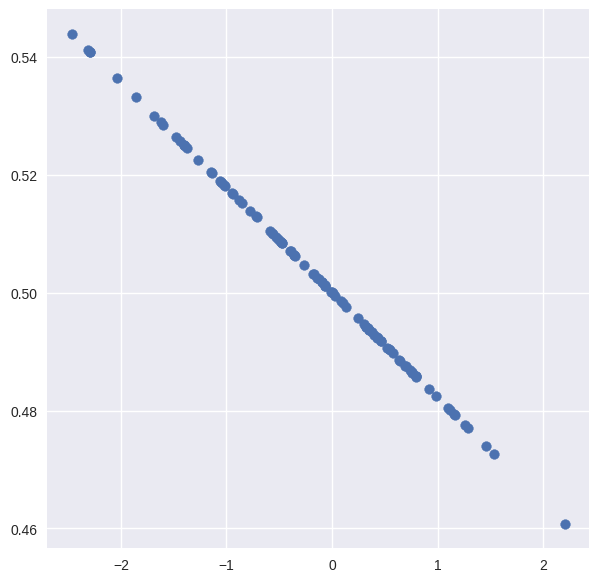

In [46]:
X = tf.random.normal(shape=(100,1))
dense = Dense(units=1, activation = 'sigmoid')

Y = dense(X)
print(Y.shape)
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X.numpy().flatten(), Y.numpy().flatten())

### Multi-variate Logistic Regression Models

In [88]:
X = tf.random.normal(shape=(100, 5))
dense = Dense(units=1, activation = 'sigmoid')

Y = dense(X)
print(Y.shape)

# fig, ax = plt.subplots(figsize=(7,7))
# ax.scatter(X.numpy().flatten(), Y.numpy().flatten())

(100, 1)


## Binary Classifier with Dense Layers

### Binary Classifier with Dense Layers

In [96]:
from tensorflow.keras.models import Sequential

X = tf.random.normal(shape=(100, 5))

model = Sequential()
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=5, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

Y = model(X)
print(Y.shape)

(100, 1)


## Softmax Layers

### IO of Softmax

In [101]:
logits = tf.random.uniform(shape=(3,5), minval=-10, maxval=10)

softmax_value = Activation('softmax')(logits)
softmax_sum = tf.reduce_sum(softmax_value, axis=1)

print(f'logits : \n{logits}')
print(f'Probabilities : \n{softmax_value.numpy()}')
print(f'Sum of softmax values : \n{softmax_sum}')

logits : 
[[ 9.753967   -2.4778605  -9.464104    4.951663   -8.517296  ]
 [ 9.258184   -2.9516697  -5.5853343   3.9649181   0.45653152]
 [-3.3483458   7.0085354   2.1281605   5.7861185   5.8794956 ]]
Probabilities : 
[[9.9185127e-01 4.8331613e-06 4.4683213e-09 8.1438972e-03 1.1516959e-08]
 [9.9484563e-01 4.9554537e-06 3.5587482e-07 4.9994169e-03 1.4970849e-04]
 [1.9547002e-05 6.1520022e-01 4.6719327e-03 1.8118723e-01 1.9892105e-01]]
Sum of softmax values : 
[1. 1. 1.]


### Softmax in Dense Layers

In [103]:
logits = tf.random.uniform(shape=(8,5), minval=-10, maxval=10)
# 마지막 Layer에서 사용
dense = Dense(units=8, activation='softmax')

Y = dense(logits)
print(tf.reduce_sum(Y, axis=1))

tf.Tensor(
[1.         1.         1.         1.         0.99999994 0.9999999
 0.9999999  1.        ], shape=(8,), dtype=float32)


## Multi-class Classifiers

### Multi-class Classifiers

In [6]:
import tensorflow as tf

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense

class TestModel(Model):
    def __init__(self):
        super(TestModel, self).__init__()

        self.dense1 = Dense(units=8, activation='relu')
        self.dense2 = Dense(units=5, activation='relu')
        self.dense3 = Dense(units=3, activation='softmax')

    def call(self, x):
        print(f'X : {x.numpy()}\n'
              f'{x.shape}\n')

        x = self.dense1(x)
        print(f'A1 : {x.numpy()}\n'
              f'{x.shape}\n')

        x = self.dense2(x)
        print(f'A2 : {x.numpy()}\n'
              f'{x.shape}\n')

        x = self.dense3(x)
        print(f'Y : {x.numpy()}\n'
              f'{x.shape}\n')
        print(f'Sum of vectors : {tf.reduce_sum(x, axis=1)}\n')

        return x

model = TestModel()

X = tf.random.uniform(shape=(8,5), minval=-10, maxval=10)
Y = model(X)


X : [[-6.461599    6.2980194  -0.38872528 -4.7889233   5.7008095 ]
 [ 6.5096474  -3.7685513   6.7442875  -6.284647    3.4990234 ]
 [ 9.798567   -1.4288158  -1.464901    2.886982   -3.212502  ]
 [ 1.9629841  -4.5347333  -5.7571483  -9.782639   -4.2953253 ]
 [-1.6384983   5.905819   -7.4992323  -8.929108   -8.595419  ]
 [-7.5791955   5.4094315   6.124977   -8.942642   -9.722164  ]
 [ 2.4678183   6.9185734   8.599909    0.93704414  6.4434433 ]
 [ 3.1574802  -7.523608   -3.1258655   3.7944555   6.34577   ]]
(8, 5)

A1 : [[ 0.          5.2200713   7.69331     0.          9.451399    0.
   0.          3.498348  ]
 [ 0.          6.7119956   1.773872    0.          1.0158987   0.
   0.          0.        ]
 [ 7.5354056   0.          0.          1.6212925   0.          2.9837527
   2.9252255   0.        ]
 [ 7.417681    0.          0.          0.2524232   3.8246686   0.9474175
   2.252415    7.2492995 ]
 [ 7.2277365   0.          1.141768    3.001492    2.1759028   8.026145
   7.774098   17.750